The story:
A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.


# Problem Statement

**Which customers are less or more loyal to an international bank?**

# Import the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##The data set of an international bank was obtained from Kaggle  
##https://www.kaggle.com/nasirislamsujan/bank-customer-churn-prediction
df = pd.read_csv("../input/deep-learning-az-ann/Churn_Modelling.csv")

In [ ]:
#Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
##First five rows and all columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
##Dropping RowNumber, CustomerId, and Surname columns. 
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Chechking NA values
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
##Changing the name of Exited column as Churn 
df.loc[(df['Exited'] == 0), 'Churn'] = 'Non-Churn'
df.loc[(df['Exited'] == 1), 'Churn'] = 'Churn'
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn


# TO-DO 

## Base Model


# EDA

In [ ]:
##Grouping ages to investigate age group effect on the churn decision 
## Student: under Age 25, Employee: Age 25- 64, Retired: Age 65 and older
df.loc[(df['Age'] < 25), 'AgeGroup'] = 'Under age 25'
df.loc[(df['Age'] >= 25) & (df['Age']<= 64), 'AgeGroup'] = 'Age 25-64'
df.loc[(df['Age'] >= 65), 'AgeGroup'] = 'Age 65 and older'
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,Age 25-64
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn,Age 25-64
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,Age 25-64
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn,Age 25-64
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn,Age 25-64


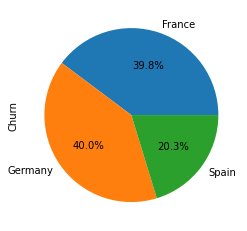

In [ ]:
freq=pd.crosstab(df.Geography, df.Churn)
freq['Churn'].plot(kind='pie', autopct='%1.1f%%')

Text(33.0, 0.5, '')

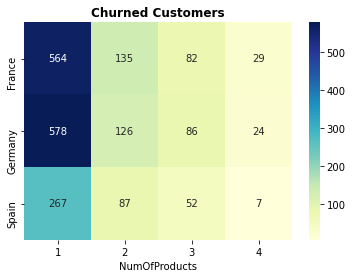

In [ ]:
mask=(df.Churn=='Churn')
freq=pd.crosstab(df[mask].Geography, df[mask].NumOfProducts)
sns.heatmap(freq, cmap="YlGnBu", annot=True, cbar=True, fmt='d')
plt.title('Churned Customers',fontsize = 12, weight='bold')
plt.ylabel("")

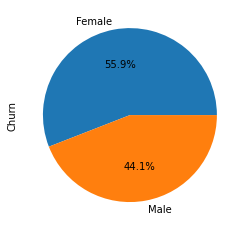

In [ ]:
freq=pd.crosstab(df.Gender, df.Churn)
freq['Churn'].plot(kind='pie', autopct='%1.1f%%')

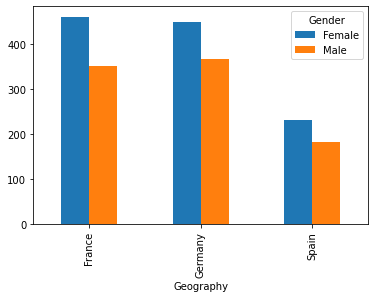

In [ ]:
mask=(df.Churn=='Churn')
freq=pd.crosstab(df[mask].Geography, df[mask].Gender)
freq.plot(kind='bar')

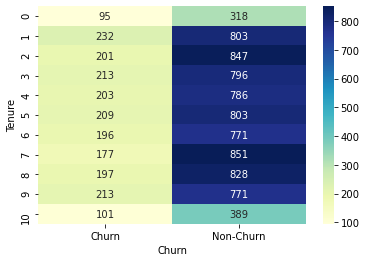

In [ ]:
sns.heatmap(pd.crosstab(df.Tenure, df.Churn), cmap="YlGnBu", annot=True, cbar=True, fmt='d')

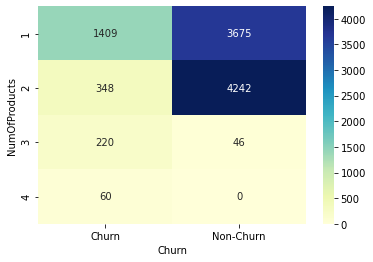

In [ ]:
sns.heatmap(pd.crosstab(df.NumOfProducts, df.Churn), cmap="YlGnBu", annot=True, cbar=True, fmt='g')

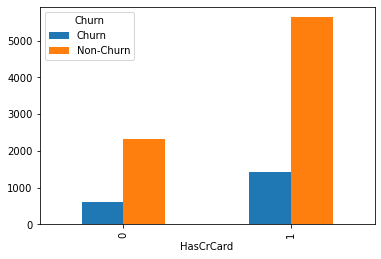

In [ ]:
freq=pd.crosstab(df.HasCrCard, df.Churn)
freq.plot(kind='bar')

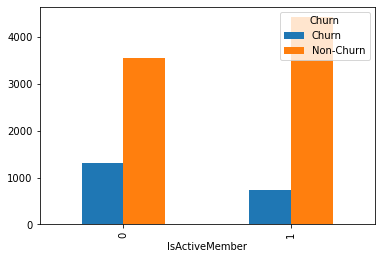

In [ ]:
freq=pd.crosstab(df.IsActiveMember, df.Churn)
freq.plot(kind='bar')

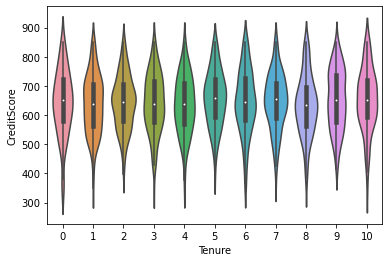

In [ ]:
mask=(df.Churn=='Churn')
sns.violinplot(x="Tenure", y="CreditScore", data=df[mask])

[]

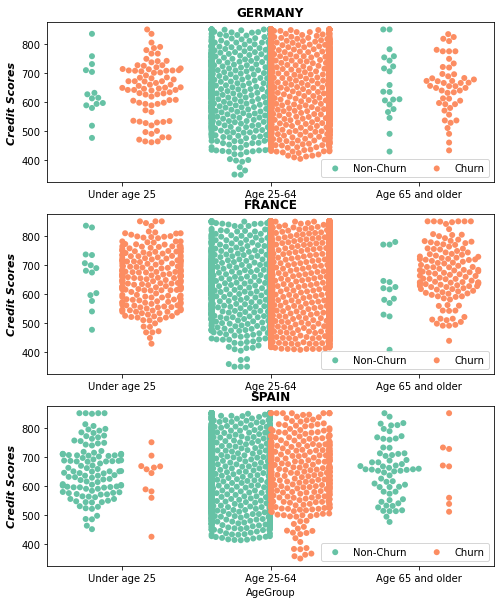

In [ ]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
mask1=(df.Geography=='Germany')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask1], size=6, palette="Set2", dodge=True, 
              order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('GERMANY',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.subplot(3,1,2)
mask2=(df.Geography=='France')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask2], size=6, palette="Set2", dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('FRANCE',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.subplot(3,1,3)
mask3=(df.Geography=='Spain')
sns.swarmplot(x="AgeGroup", y="CreditScore", hue="Churn", data=df[mask3], size=6, palette="Set2", dodge=True,
              order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.ylabel('Credit Scores',fontsize = 11, style='italic', weight='bold')
plt.title('SPAIN',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='lower right')
plt.xticks(size = 10)
plt.yticks(size = 10);
plt.plot()

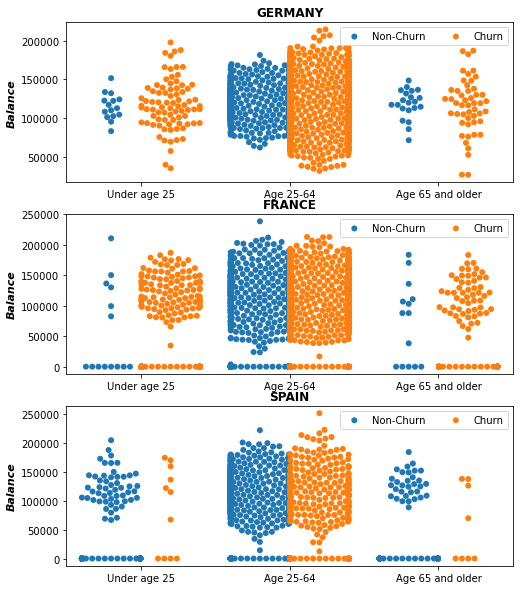

In [ ]:
plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
mask1=(df.Geography=='Germany')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask1], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('GERMANY',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.subplot(3,1,2)
mask2=(df.Geography=='France')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask2], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('FRANCE',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.subplot(3,1,3)
mask3=(df.Geography=='Spain')
sns.swarmplot(x="AgeGroup", y="Balance", hue="Churn", data=df[mask3], size=6, dodge=True,
             order=["Under age 25", "Age 25-64", "Age 65 and older"])
plt.xlabel("")
plt.ylabel('Balance',fontsize = 11, style='italic', weight='bold')
plt.title('SPAIN',fontsize = 12, weight='bold')
plt.legend(['Non-Churn', 'Churn'], ncol=2, loc='upper right')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.plot();

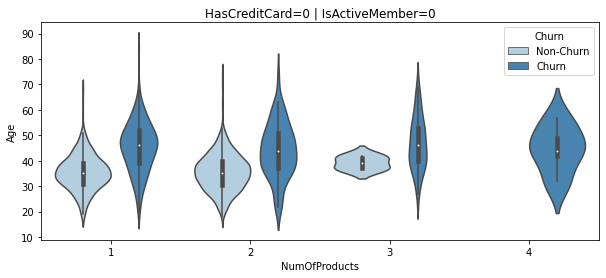

In [ ]:
plt.figure(figsize=[10,4])
mask=(df.HasCrCard==0) & (df.IsActiveMember==0)
sns.violinplot(x="NumOfProducts", y="Age", hue="Churn", data=df[mask], palette="Blues")
plt.xlabel("NumOfProducts")
plt.ylabel("Age")
plt.title('HasCreditCard=0 | IsActiveMember=0',fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10);

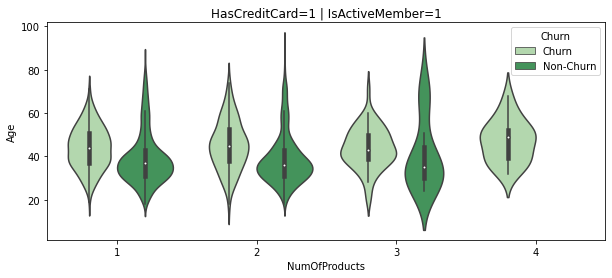

In [ ]:
plt.figure(figsize=[10,4])
mask=(df.HasCrCard==1) & (df.IsActiveMember==1)
sns.violinplot(x="NumOfProducts", y="Age", hue="Churn", data=df[mask], palette="Greens")
plt.xlabel("NumOfProducts")
plt.ylabel("Age")
plt.title('HasCreditCard=1 | IsActiveMember=1',fontsize = 12)
plt.xticks(size = 10)
plt.yticks(size = 10);

The main idea from here onwards is to convert numeric values into categorical ones since we are trying to classify customers who churned or not.

Methods that we will try in this dataset -

1. Binning
2. One Hot Encoding

In [ ]:
#Returns "what it says" - counts of a value in a particular column.
#bins - is a very underrated parameter but it can be used to get some really good
#grouping of data values

df.CreditScore.value_counts(bins=3)

(516.667, 683.333]    5350
(683.333, 850.0]      3741
(349.499, 516.667]     909
Name: CreditScore, dtype: int64

In [ ]:
# To get number of unique values in Geography column

df.Geography.nunique()

3

# Feature Engineering

In [ ]:
data=df.copy()

In [ ]:
# Creation of dummy variables for Gender and Geography 
# Idea behind this - 'Geography' if label encoded in 0, 1 ,2 will have no meaning , thus the model wont't be able to understand the importance of this column . 
#However label encoding 'Gender' could have made sense in a way and can also be done alternatively.

gender_cat = pd.get_dummies(data['Gender'] , drop_first=True)
geo_cat = pd.get_dummies(data['Geography'] , drop_first=True)

data=pd.concat([data , gender_cat ,geo_cat] , axis=1)

In [ ]:
# Practice of checking the update done by above cell
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,AgeGroup,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,Age 25-64,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn,Age 25-64,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,Age 25-64,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn,Age 25-64,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn,Age 25-64,0,0,1


In [ ]:
#Dropping "of no use" columns to eliminate redundancy.

data.drop(columns=['Gender', 'Geography'] , axis = 1 , inplace = True )

In [ ]:
#Data that needs to trained goes in X and respective labels into y (here 'Exited').

from sklearn.model_selection import train_test_split
y = data['Exited']
X = data.drop(['Churn','AgeGroup','Exited'] , axis = 1)

#Splitting the data into training and testing by specifying it in the test_size ,using other parameters i.e. random_state and shuffle depends on you solely.

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state=0 , shuffle=False)

* **Standardization** -   *we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights.*

In [ ]:
# Scaling is a crucial step to get apt results when your data value range across columns differ in large scale.

# StandardScaler and MinMaxScaler are more common when dealing with continuous numerical data.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#Below columns get scaled for train and test respectively.
X_train[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']] = ss.fit_transform(X_train[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']])
X_test[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']] = ss.fit_transform(X_test[['Age',"Tenure" , 'Balance' , 'CreditScore' , "EstimatedSalary" , 'NumOfProducts']])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
#Importing the libraries we need to build a neural network

from tensorflow import keras
from tensorflow.keras import layers , Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:

model=Sequential([
    layers.Dense(8, activation = 'relu' , input_shape = [11]),
    layers.Dense(8 , activation = 'relu' ),
    layers.Dense(1 , activation = 'sigmoid')
])
      

**NOTE** - *The most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.*

Once the model gets defined it can now be compiled. 

* **optimizer** - adam ( stochasticc gradient descent algorithm ) , because it automatically tunes itself and give good results. 

* **loss** - binary crossentropy ( to evaluate the error in current state of the model which will be estimated repeatedly )

* **metrics** = reports the classification accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Once the model gets compiled its ready to be trained.

**Epoch** can be thought of as a nested for-loop  that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

**Batch** is analogous to a for-loop iterating over one or more samples and making predictions.

These configurations can be chosen by trial and error.


In [ ]:
model.fit(X_train, y_train, batch_size = 25, epochs = 10,verbose = 1)


Epoch 1/10
280/280 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7800
Epoch 2/10
280/280 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7950
Epoch 3/10
280/280 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8070
Epoch 4/10
280/280 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8137
Epoch 5/10
280/280 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8156
Epoch 6/10
280/280 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8203
Epoch 7/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8223
Epoch 8/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8287
Epoch 9/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8426
Epoch 10/10
280/280 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8440

In [ ]:
# Predicting on train data
y_pred = model.predict(X_train)
score, acc = model.evaluate(X_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc*100)


700/700 [==============================] - 1s 922us/step - loss: 0.3626 - accuracy: 0.8464
Train score: 0.36258891224861145
Train accuracy: 84.64285731315613


In [ ]:
# Predicting on test data
y_pred = model.predict(X_test)
score, acc = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)


300/300 [==============================] - 0s 936us/step - loss: 0.3670 - accuracy: 0.8493
Test score: 0.36697012186050415
Test accuracy: 84.93333458900452


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)*1
print(classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2406
           1       0.68      0.45      0.54       594

    accuracy                           0.85      3000
   macro avg       0.78      0.70      0.72      3000
weighted avg       0.84      0.85      0.84      3000



In [ ]:
#Option-2
from keras.models import Sequential
from keras.layers import Dense

classifier=Sequential()

#Input LAyer
classifier.add(Dense(11,activation='relu',input_dim=11))

#Hidden LAyers
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dense(6,activation='relu'))

#Output LAyer
classifier.add(Dense(1,activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 337
Trainable params: 337
Non-trainable params: 0
________________________________________________________

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse'])

Epoch 1/10
7000/7000 [==============================] - 1s 80us/step - loss: 0.5307 - accuracy: 0.7937 - mse: 0.1730
Epoch 2/10
7000/7000 [==============================] - 0s 45us/step - loss: 0.4629 - accuracy: 0.7939 - mse: 0.1486
Epoch 3/10
7000/7000 [==============================] - 0s 45us/step - loss: 0.4381 - accuracy: 0.7939 - mse: 0.1403
Epoch 4/10
7000/7000 [==============================] - 0s 44us/step - loss: 0.4260 - accuracy: 0.7976 - mse: 0.1357
Epoch 5/10
7000/7000 [==============================] - 0s 45us/step - loss: 0.4175 - accuracy: 0.8041 - mse: 0.1325
Epoch 6/10
7000/7000 [==============================] - 0s 46us/step - loss: 0.4067 - accuracy: 0.8126 - mse: 0.1288
Epoch 7/10
7000/7000 [==============================] - 0s 44us/step - loss: 0.3911 - accuracy: 0.8216 - mse: 0.1232
Epoch 8/10
7000/7000 [==============================] - 0s 45us/step - loss: 0.3774 - accuracy: 0.8323 - mse: 0.1183
Epoch 9/10
7000/7000 [==============================] - 0s 45us/

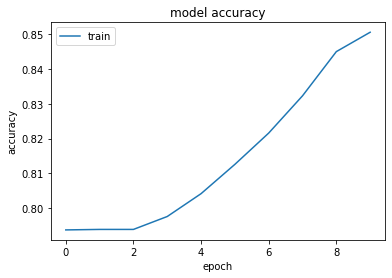

In [ ]:
history=classifier.fit(X_train,y_train,epochs=10)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.5)*1
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2406
           1       0.81      0.34      0.48       594

    accuracy                           0.85      3000
   macro avg       0.83      0.66      0.70      3000
weighted avg       0.85      0.85      0.83      3000



In [ ]:

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(11,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________
None


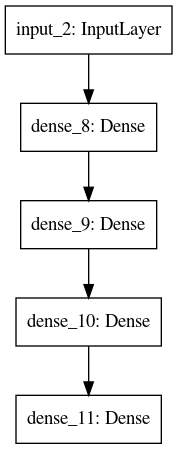

In [ ]:
#Option-3
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(11,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model_func = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model_func, to_file='multilayer_perceptron_graph.png')

In [ ]:
model_func.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_func.fit(X_train, y_train, batch_size = 25, epochs = 10,verbose = 1)


Epoch 1/10
7000/7000 [==============================] - 1s 75us/step - loss: 0.5342 - accuracy: 0.7646
Epoch 2/10
7000/7000 [==============================] - 0s 50us/step - loss: 0.4359 - accuracy: 0.8057
Epoch 3/10
7000/7000 [==============================] - 0s 50us/step - loss: 0.4048 - accuracy: 0.8183
Epoch 4/10
7000/7000 [==============================] - 0s 60us/step - loss: 0.3855 - accuracy: 0.8273
Epoch 5/10
7000/7000 [==============================] - 0s 57us/step - loss: 0.3723 - accuracy: 0.8406
Epoch 6/10
7000/7000 [==============================] - 0s 53us/step - loss: 0.3636 - accuracy: 0.8451
Epoch 7/10
7000/7000 [==============================] - 0s 50us/step - loss: 0.3588 - accuracy: 0.8476
Epoch 8/10
7000/7000 [==============================] - 0s 49us/step - loss: 0.3545 - accuracy: 0.8486
Epoch 9/10
7000/7000 [==============================] - 0s 49us/step - loss: 0.3521 - accuracy: 0.8514
Epoch 10/10
7000/7000 [==============================] - 0s 54us/step - l